Names:
- Manuel López Vargas
- Nelson Eduardo Cruz Sanchez

# Looking for the best SDSS classifier


## 1.- Introducction

#### Este trabajo trata sobre clasificación de objetos celestes usando diferentes algoritmos de Machine Learning, utilizando un catalogo de la base de datos del Sloan Sky Digital Survey (SSDS). Utilizamos los datos ignorando los errores instrumentales de las medidas.

#### El objetivo de este trabajo es usar diferentes algoritmos de ML para clasificar objetos tomados de la base de datos de SDSS, que consta de estrellas, galaxias y quasares, y luego ver cual de todos estos métodos es el más eficiente.
#### El trabajo original del que nos basamos utiliza todos los datos de la tabla, y nosotros vamos a descartar los quasares quedandonos solamente con estrellas y galaxias.

 This paper deals with classification of celestial objects using different Machine Learning algorithms, using a catalog of the Sloan Sky Digital Survey (SSDS) database. We use the data ignoring the instrumental errors of the measurements.

The objective of this work is to use different ML algorithms to classify objects taken from the SDSS database, consisting of stars, galaxies and quasars, and then see which of these methods is the most efficient.

 The original work we are based on uses all the data in the table, and we are going to discard the quasars and keep only stars and galaxies.

## 2.- Data analysis

#### Las diferentes columnas de la tabla corresponden a: 

#### ra y dec: Respectivamente, ascensión recta y declinación. Representación de la posición del objeto en la esfera celeste

#### u, g, r, i, z: Magnitudes de Thuan-Gunn. Se refieren a la respuesta del objeto a las diferentes bandas de frecuencia del telescopio.

#### corrimiento al rojo: Efecto que se produce cuando la luz de un objeto muy lejano aumenta su longitud de onda.

#### mjd: Fecha juliana modificada en la que se tomó la imagen.

The differents labels of the table are: 

ra y dec: Respectively, right ascension and declination. Representing the position of the object in the celestial sphere

u, g, r, i, z: Thuan-Gunn magnitudes. They refer to the response of the object to the different frequency bands of the telescope.

redshift: Effect that happens when light from a very distant object is increased in wavelength.

mjd: Modified Julian Date on which the image was taken.

In [78]:
# We load the data. Those that have nothing to do with the features of the objects are ignored.

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

data_01=pd.read_csv(r'/home/anakin/Documents/CursoML/Skyserver_SQL2.csv', skiprows=1)

data_01.drop(['objid', 'run', 'rerun', 'camcol', 'field', 'specobjid', 'plate', 'fiberid'], axis=1, inplace=True)

In [14]:
mask_q=data_01['class'] == 'QSO'

datos_sdss=data_01[~mask_q]

datos_sdss.reset_index(inplace=True)



In [15]:
# We have a general look at the features


datos_sdss.head(9900)

,index,ra,dec,u,g,r,i,z,class,redshift,mjd
0,0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009,54922
1,1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055,51615
2,2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111,52023
3,3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,STAR,-0.000111,54922
4,4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,STAR,0.000590,54922
...,...,...,...,...,...,...,...,...,...,...,...
9145,9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,GALAXY,0.027583,51877
9146,9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,GALAXY,0.117772,51877
9147,9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,STAR,-0.000402,57013
9148,9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,GALAXY,0.014019,51877


In [16]:
print('                                         TABLE 1')
datos_sdss.describe()



                                         TABLE 1


,index,ra,dec,u,g,r,i,z,redshift,mjd
count,9150.000000,9150.000000,9150.000000,9150.000000,9150.000000,9150.000000,9150.000000,9150.000000,9150.000000,9150.000000
mean,4988.752568,175.349953,14.303436,18.589297,17.250536,16.686981,16.418556,16.250796,0.043896,52966.687104
std,2888.996453,47.844894,24.879069,0.842478,0.876612,0.961771,1.027774,1.085480,0.052491,1503.083498
min,0.000000,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,-0.004136,51578.000000
25%,2468.250000,157.584047,-0.541007,18.124177,16.737642,16.103342,15.790297,15.551233,0.000050,51900.000000
50%,4996.500000,180.326741,0.384792,18.822605,17.415660,16.757515,16.448885,16.263595,0.030734,51999.000000
75%,7497.750000,201.069175,14.646150,19.246002,17.893400,17.369435,17.097865,16.959817,0.080849,54468.000000
max,9999.000000,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,0.855881,57481.000000


 #### Table 1: Aquí se observan algunos parámetros estadisticos de nuestros datos. 

Table 1: Here are some statistical parameters of our data. 

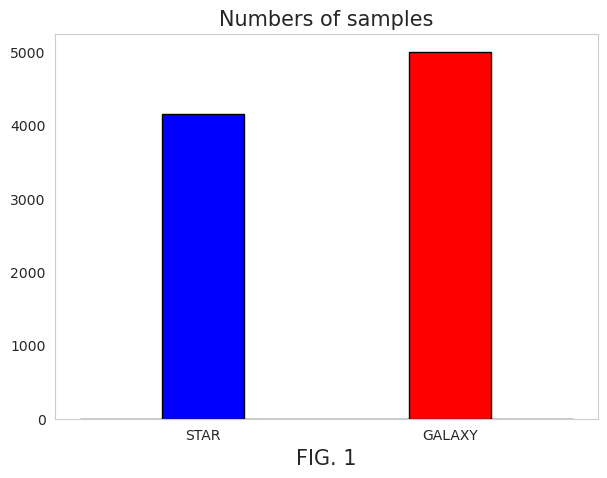

In [17]:
#datos_sdss.class['STAR','GALLAXY']

classes=np.array(datos_sdss['class'])

mask_s=classes=='STAR'
mask_g=classes=='GALAXY'

star_color='blue'
galaxy_color='red'

array_color=[star_color, galaxy_color]

star=classes[mask_s]
galaxy=classes[mask_g]

fig, ax=plt.subplots(1, 1, figsize=(7,5))

ax.set_xlabel('FIG. 1', fontsize=15)
ax.set_title('Numbers of samples', fontsize=15)
ax.hist(star, histtype='bar', bins=3, facecolor='blue', edgecolor='black')
ax.hist(galaxy, histtype='bar', bins=3, facecolor='red', edgecolor='black')
plt.grid()
plt.show()




#### This color legend will be maintained through all the notebook



#### How does the data relate to each other?


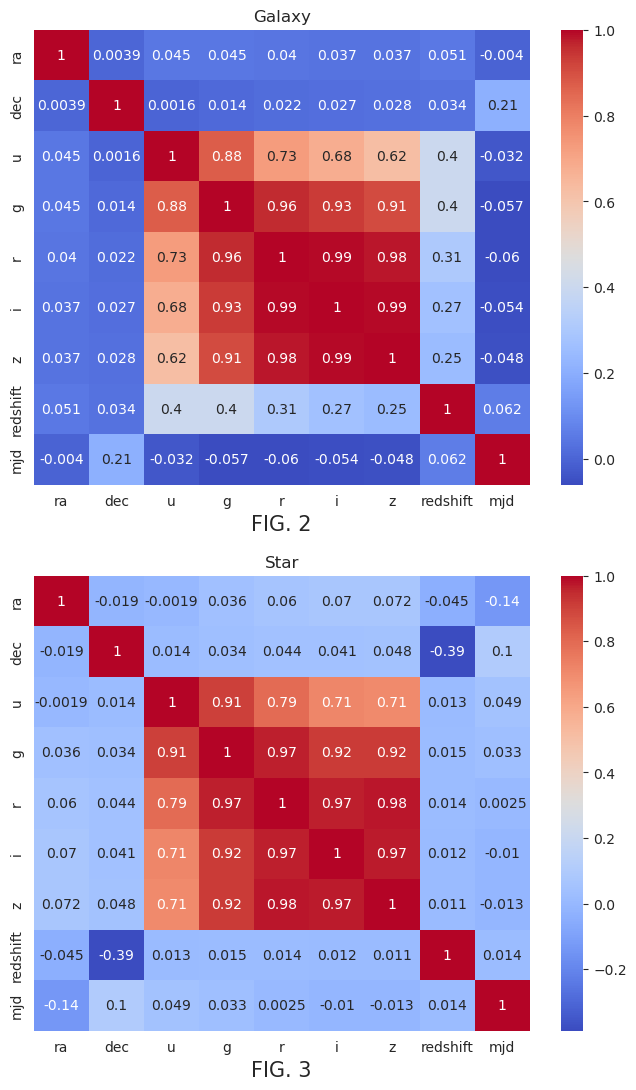

In [18]:
# We see the correlation matrix between the datab of each class.

ig, axes = plt.subplots(nrows=2, ncols=1,figsize=(8,13))
fig.set_dpi(100)
ax = sns.heatmap(datos_sdss[datos_sdss['class']=='GALAXY'][['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift', 'mjd']].corr(), ax = axes[0], cmap='coolwarm', annot=True)
ax.set_title('Galaxy')
ax.set_xlabel('FIG. 2', fontsize=15)
ax = sns.heatmap(datos_sdss[datos_sdss['class']=='STAR'][['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift', 'mjd']].corr(), ax = axes[1], cmap='coolwarm', annot=True)
ax.set_title('Star')
ax.set_xlabel('FIG. 3', fontsize=15);


#### Fig. 2: Aquí se observa la martiz de correlación de los datos de las galaxias, que nos da una medida de la dependencia estadística de las variables. Vemos que hay una fuerte dependencia estadística entre las variables fotométricas (ugriz), mas no con el redshift, mjd y las coordenadas celestes, como es de esperar. 

#### Fig. 3: Aquí se observa la martiz de correlación de los datos de las estrellas. Vemos que hay una fuerte dependencia estadística entre las variables fotométricas (ugriz), mas no con el redshift, mjd y las coordenadas celestes, como es de esperar. 

Fig. 2: Here we see the correlation martization of the galaxy data, which gives us a measure of the statistical dependence of the variables. We see that there is a strong statistical dependence between the photometric variables (ugriz), but not with the redshift, mjd and celestial coordinates, as expected. 

Fig. 3: Here we see the correlation martization of the star data. We see that there is a strong statistical dependence between the photometric variables (ugriz), but not with the redshift, mjd and the celestial coordinates, as expected. 

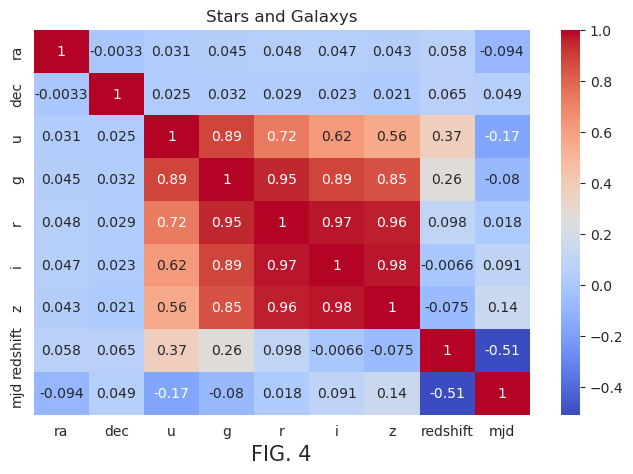

In [109]:
# and with all the classes together

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(8, 5))
fig.set_dpi(100)
ax = sns.heatmap(datos_sdss[['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift', 'mjd']].corr(), cmap='coolwarm', annot=True)
ax.set_title('Stars and Galaxys')
ax.set_xlabel('FIG. 4', fontsize=15);

#### Fig. 4: Aquí se observa la martiz de correlación de los datos de ambos objetos. Vemos que hay una fuerte dependencia estadística entre las variables fotométricas (ugriz), mas no con el redshift, mjd y las coordenadas celestes, como es de esperar. 

Fig. 4: Here we can see the correlation martization of the data of both objects. We see that there is a strong statistical dependence between the photometric variables (ugriz), but not with the redshift, mjd and the celestial coordinates, as expected. 

## Analysis of the photometric data.

                                                       FIG. 5


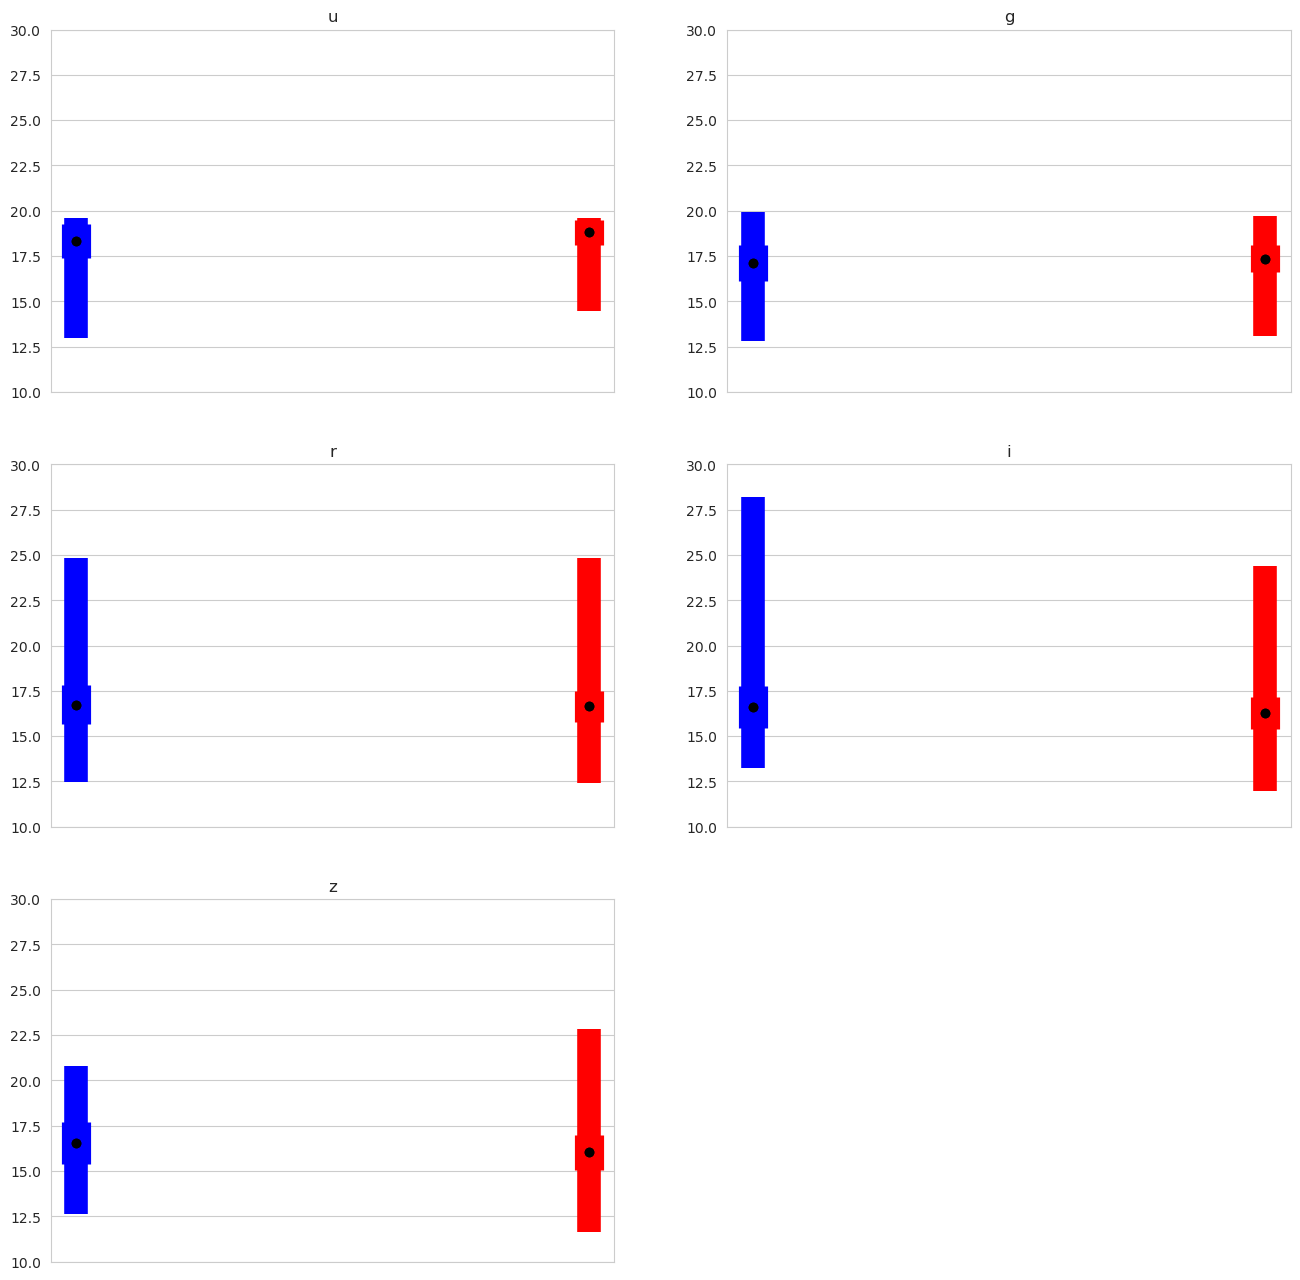

In [108]:
fig=plt.figure(1,figsize=(16,16))

ugriznames_array=['u','g','r','i','z']

for i in range(5):

    ax = fig.add_subplot(3, 2, i+1)
    ax.set_ylim(10,30)
    ax.xaxis.grid(False)
    # construct some data like what you have:
    u_errorbar= [datos_sdss[datos_sdss['class']=='STAR'][ugriznames_array[i]],
                 datos_sdss[datos_sdss['class']=='GALAXY'][ugriznames_array[i]],]
    #ax.set_xlabel(f'FIG. {i+5}', fontsize=15)
    x=[0,1];

    mins = np.array([u_errorbar[0].min(0),u_errorbar[1].min(0)])
    maxes = np.array([u_errorbar[0].max(0),u_errorbar[1].max(0)])
    means = np.array([u_errorbar[0].mean(0),u_errorbar[1].mean(0)])
    std = np.array([u_errorbar[0].std(0),u_errorbar[1].std(0)])

    # create stacked errorbars:
    plt.errorbar(np.arange(2), means, std, fmt='ok', linewidth=21, ecolor=array_color)
    plt.errorbar(np.arange(2), means, [means - mins, maxes - means],
                 fmt='ok', ecolor=array_color, lw=17)
    plt.tick_params( axis='x', which='both', bottom=False,top=False,labelbottom=False)

    plt.title(ugriznames_array[i])
    
print('                                                       FIG. 5')

#### Fig 5: Se observa los valores estadísticos de los datos fotométricos de estrellas en azul y galaxias en rojo para cada banda del sistema ugriz, donde los puntos negros corresponden a la media, las barras de error anchas corresponden a las desviaciónes estandar (std) de cada filtro,  las barras de error angostas superiores corresponden a la [media $-$ min] y las inferiores a la [media $-$ max].

Fig 5: Statistical values of the photometric data of stars in blue and galaxies in red for each band of the ugriz system, where the black dots correspond to the mean, the wide error bars correspond to the standard deviations (std) of each filter, the narrow upper error bars correspond to [mean $-$ min] and the lower ones to [mean $-$ max].

#### Dimensionality reduction

The variables related to the Thuan-Gunn magnitudes will be subject to a reduction in their dimensionality. Its very high correlation will allow us to reduce the number of dimensions without much loss of information. We will go from 5 to 2 characteristics.

In [21]:
from sklearn.preprocessing import StandardScaler

features = ['u','g','r', 'i', 'z'];

# Normalization of the features
x = datos_sdss.loc[:, features].values
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

prinComp = pca.fit_transform(x)

ugriz_pca_Df = pd.DataFrame(data = prinComp, columns = ['ugriz_pca1','ugriz_pca2'])

#We create the final data set
sdss_finaldata=pd.concat([ datos_sdss[['ra']], datos_sdss[['dec']], ugriz_pca_Df, datos_sdss[['redshift']], datos_sdss[['class']], datos_sdss[['mjd']] ], axis = 1)



                                         FIG. 6


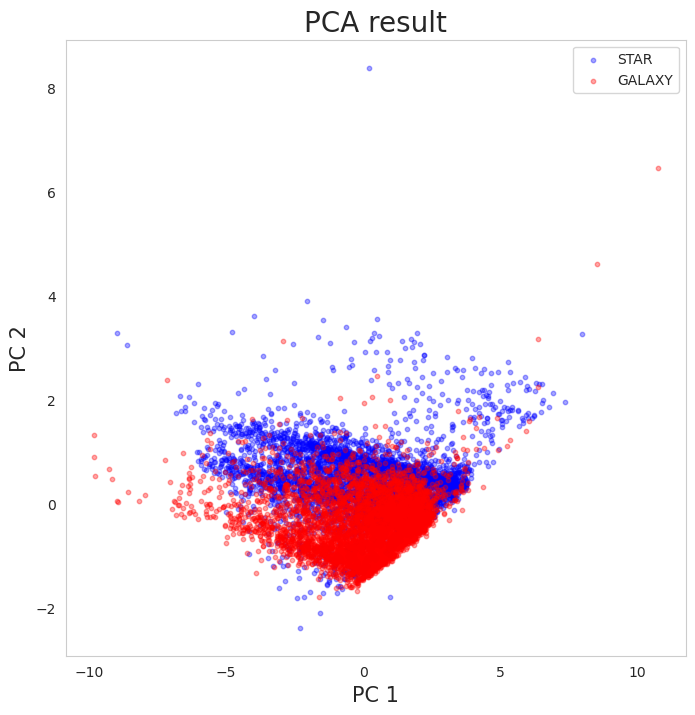

In [87]:
#The data is displayed according to the two main ugriz components

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(r'PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('PCA result', fontsize = 20)

clases = ['STAR', 'GALAXY']
colors = ['blue', 'red']
for clases, color in zip(clases,colors):
    indicesToKeep = sdss_finaldata['class'] == clases
    ax.scatter(ugriz_pca_Df.loc[indicesToKeep, 'ugriz_pca1'], ugriz_pca_Df.loc[indicesToKeep, 'ugriz_pca2']
               , c = color, s = 10,alpha=0.35)
ax.legend(['STAR', 'GALAXY'])
ax.grid()
print('                                         FIG. 6');

#### Fig. 6: Aquí graficamos las dos nuevas variables, pc1 vs pc2 para estrellas y galaxias. Estas nuevas variables son el resultado de la reducción dimensional de las variables u,g,r,i,z.

 Fig. 6: Here we plot the two new variables, pc1 vs pc2 for stars and galaxies. These new variables are the result of the dimensional reduction of the u,g,r,i,z variables.

## 3.- Classification

#### Los algoritmos que usaremos son los siguientes:
- K-Nearest Neighbours (KNN).
- Support Vector Machine (SVM).
- XGBOOST.
- Neuronal Network.

#### Hacemos uso de KNN y SVM debido a que son los que se usaron en el trabajo original y complementamos utilizando XGBOOST y Neuronal Network. 

#### Luego compararemos estos modelos para ver cual es el más eficiente.

The algorithms we will use are the following:
- K-Nearest Neighbours (KNN).
- Support Vector Machine (SVM).
- XGBOOST.
- Neuronal Network.

We use KNN and SVM because they are the ones used in the original work and we complement them using XGBOOST and Neuronal Network. 

We will then compare these models to see which is the most efficient.

In [49]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score
import time

In [50]:
# Some algorithms don't support categorical classes so we'll have to replace them with numbers
d=pd.DataFrame(sdss_finaldata)

class_num=pd.DataFrame(LabelEncoder().fit_transform(d['class']), columns=['class'])
d.drop(['class'], axis=1, inplace=True)
names=list(d)

In [51]:
#Data are normalized for better conditioning of the problem

scaler = MinMaxScaler()
d=pd.DataFrame(scaler.fit_transform(d), columns=names)


d=pd.concat([d, class_num], axis=1)


#### Aplicamos un algorítmo para entrenar nuestros datos.

We apply an algorithm to train our data.

In [101]:
#A cross validation will be performed to ensure the reliability of the results.

#In addition, an isolated training will serve to measure the times and extract a matrix of confusion than will give us a general idea.

x=d.drop('class',axis=1);
y=d['class']

x_train, x_test, y_train, y_test = train_test_split(d.drop('class',axis=1), d['class'], test_size=0.4)



### KNN Regression


In [53]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Crating and fitting the classifier
knn = KNeighborsClassifier(n_neighbors = 10)

training_start = time.perf_counter()
knn.fit(x_train, y_train)
training_end = time.perf_counter()

In [54]:
# Predicting and seeing the accuracy
from sklearn.metrics import accuracy_score

predict_start = time.perf_counter()
pred = knn.predict(x_test)
predict_end = time.perf_counter()

acc  = accuracy_score(pred, y_test)

print(f"The accuracy of the model was {acc*100}%")

The accuracy of the model was 95.49180327868852%


In [55]:
# Finding the best value of n_neighbors

n_neighbors = range(1,20)
acc_scores  = []

for i in n_neighbors:
  # Creating and fitting the KNN
  knn = KNeighborsClassifier(n_neighbors = i).fit(x_train, y_train)

  # Predicting new values
  pred = knn.predict(x_test)

  # Calculating the accuracy
  acc  = accuracy_score(pred, y_test)
  acc_scores.append(acc)

print("Acurracy of using 3 neighbors:", acc_scores[2]*100)

Acurracy of using 3 neighbors: 97.02185792349727


                            FIG. 7


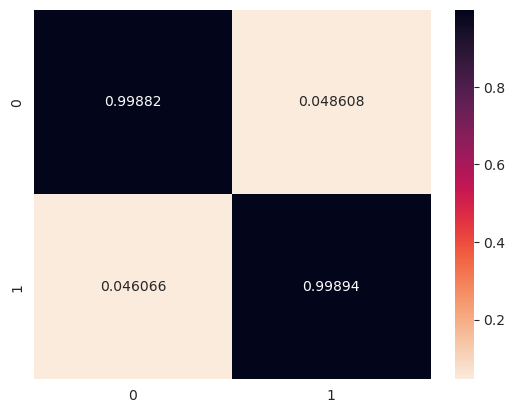

In [56]:
mc=confusion_matrix(pred,y_test)
mc_norm = mc / np.linalg.norm(mc, axis=1, keepdims=True)
sns.heatmap(pd.DataFrame(mc_norm), cmap=sns.cm.rocket_r, annot=True, fmt='.5g')
print('                            FIG. 7');

#### Fig. 7: Aquí se observa la Matriz de Confusión es una herramienta que nos permite la visualización del desempeño del algorítmo. La diagonal nos muestra las clasificaciones verdaderas de galaxias [0,0] y estrellas [1,1], y la antidiagonal las clasificaciones falsas, donde cada elemento fue normalizado por el tamaño total de objetos de su respectiva clase. Se observa que las calsificaciones para ambos objetos tienen un alto porcentaje de verdaderos y un bajo porcentaje de falsos.

Fig. 7: The Confusion Matrix is a tool that allows us to visualize the performance of the algorithm. The diagonal shows the true classifications of galaxies [0,0] and stars [1,1], and the anti-diagonal shows the false classifications, where each element was normalized by the total size of objects in its respective class. It is observed that the ratings for both objects have a high percentage of true and a low percentage of false.

In [57]:
knn_train_t=training_end-training_start;
knn_predict_t=predict_end-predict_start;

scores = cross_val_score(knn, x, y, cv=10, scoring = "accuracy")
score_knn=scores.mean()
print("The 10 cross validations of K- Nearest Neighbours have had an average success rate of %3.2f %%" %(score_knn*100))
std_knn=scores.std()
print("..and a standar deviation of %8.5f" %(std_knn))

The 10 cross validations of K- Nearest Neighbours have had an average success rate of 95.76 %
..and a standar deviation of  0.01078


## Support Vector Machine Classifier

In [58]:
# Support Vector Machine
from sklearn.svm import SVC

training_start = time.perf_counter()
svm_model = SVC().fit(x_train, y_train)
training_end = time.perf_counter()

# Predicting some values

predict_start = time.perf_counter()
pred = svm_model.predict(x_test)
predict_end = time.perf_counter()

In [59]:
# Accuracy of SVM

acc = accuracy_score(pred, y_test)
print(f"The accuracy of the SVM method was {acc*100}%")

The accuracy of the SVM method was 98.30601092896175%


                          FIG. 8


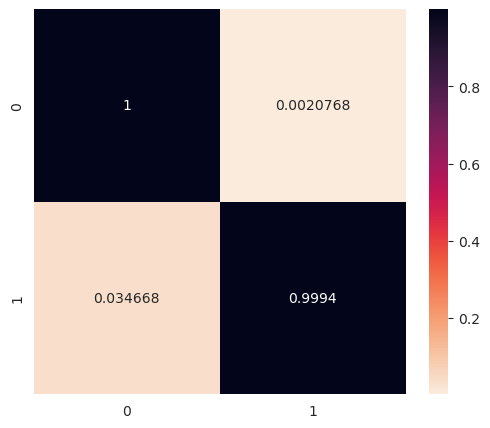

In [60]:
# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

cf_matrix = confusion_matrix(pred, y_test)

# Plot the figure
plt.figure(figsize=(6,5))
sns.heatmap(cf_matrix/np.linalg.norm(cf_matrix, axis=1, keepdims=True), annot=True, 
            fmt='.5g', cmap=sns.cm.rocket_r )
print('                          FIG. 8');

#### Fig. 8: Aquí se observa la Matriz de Confusión donde la diagonal nos muestra las clasificaciones verdaderas de galaxias [0,0] y estrellas [1,1], y la antidiagonal las clasificaciones falsas. Se observa que las calsificaciones para ambos objetos tienen un alto porcentaje de verdaderos y un bajo porcentaje de falsos.

Fig. 8: Here we see the Confusion Matrix where the diagonal shows the true classifications of galaxies [0,0] and stars [1,1], and the anti-diagonal shows the false classifications. It is observed that the classifications for both objects have a high percentage of true and a low percentage of false.

In [61]:
svm_train_t=training_end-training_start;
svm_predict_t=predict_end-predict_start;

scores = cross_val_score(svm_model, x, y, cv=10, scoring = "accuracy")
score_svm=scores.mean()
print("The 10 cross validations of SVM have had an average success rate of %3.2f %%" %(score_svm*100))
std_svm=scores.std()
print("..and a standar deviation of %8.6f" %(std_svm))

The 10 cross validations of SVM have had an average success rate of 98.67 %
..and a standar deviation of 0.004980


## XGBoost

In [70]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler

X_scaler, y_scaler = MinMaxScaler(), MinMaxScaler()

# Fitting the scalers and transforming the training sets
X_train = X_scaler.fit_transform(x_train)
y_train = y_scaler.fit_transform(y_train)#.to_numpy().reshape(-1,1))

# Transforming the test set
X_test = X_scaler.transform(x_test)

In [102]:
warnings.filterwarnings("ignore")

#XGBoost
import xgboost as xgb

xgbr = xgb.XGBRegressor(n_estimators=500)

# Fitting XGBoost
training_start = time.perf_counter()
xgbr.fit(x_train, y_train)
training_end = time.perf_counter()

# Predicting for the test set
predict_start = time.perf_counter()
y_pred = xgbr.predict(x_test)
y_pred = y_scaler.inverse_transform(y_pred.reshape(-1,1))
predict_end = time.perf_counter()

#### Let's see the R2 and RMSE.

In [103]:
# Metrics of the XGBoost prediction
from sklearn.metrics import mean_squared_error, r2_score
score_xgb = r2_score(y_test, y_pred)
std_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
print("The R2 was:", score_xgb)
print("The RMSE was:", std_xgb)

The R2 was: 0.9964165125961707
The RMSE was: 0.02978435631976101


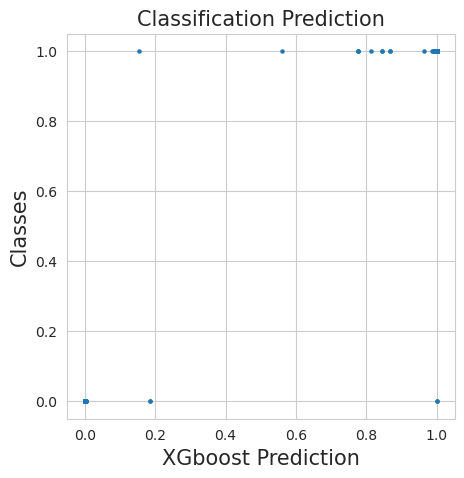

                              FIG. 9


In [104]:
# Plotting the predict
plt.figure(figsize=(5,5))
plt.scatter(y_pred, y_test, s=5)
plt.title("Classification Prediction", fontsize=15)
plt.xlabel("XGboost Prediction", fontsize=15)
plt.ylabel("Classes", fontsize=15)
plt.show()
print('                              FIG. 9');

#### FIG. 9: Se observa que para 'Classes'$=$1 los puntos de predicción se acercan a 1 y para 'Classes'$=$0 los puntos de prediccción se acercan a 0, como es de esperar si el modelo funciona bien. 

FIG. 9: It is observed that for 'Classes'$=$1 the prediction points are close to 1 and for 'Classes'$=$0 the prediction points are close to 0, as expected if the model works well. 

In [100]:
xgb_train_t=training_end-training_start;
xgb_predict_t=predict_end-predict_start;

### Neural Network

The first iteration of the Neural Networks gives an accuracy of the 99.62 %
                           FIG. 10


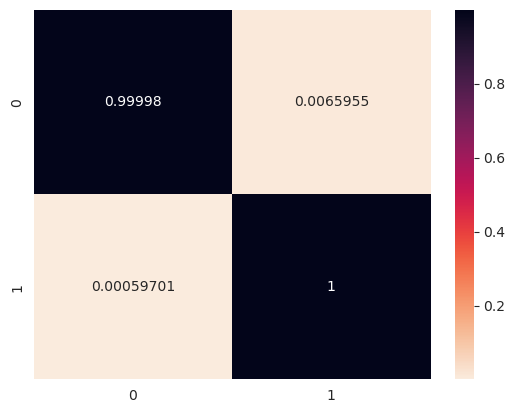

In [79]:
warnings.filterwarnings("ignore")

from sklearn.neural_network import MLPClassifier

nnc = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(4, 3), random_state=1)

training_start = time.perf_counter()
nnc.fit(x_train, y_train)                         
training_end = time.perf_counter()

predict_start = time.perf_counter()
preds=nnc.predict(x_test)
predict_end=time.perf_counter()

acc_nnc = (preds == y_test).sum().astype(float) / len(preds)*100
print("The first iteration of the Neural Networks gives an accuracy of the %3.2f %%" % (acc_nnc))
mc=confusion_matrix(y_test, preds)
mc_norm = mc / np.linalg.norm(mc, axis=1, keepdims=True)
sns.heatmap(pd.DataFrame(mc_norm), cmap=sns.cm.rocket_r, annot=True, fmt='.5g')
print('                           FIG. 10');

#### Fig. 10: Aquí se observa la Matriz de Confusión donde la diagonal nos muestra las clasificaciones verdaderas de galaxias [0,0] y estrellas [1,1], y la antidiagonal las clasificaciones falsas. Se observa que las calsificaciones para ambos objetos tienen un alto porcentaje de verdaderos y un bajo porcentaje de falsos.

Fig. 10: Here we see the Confusion Matrix where the diagonal shows the true classifications of galaxies [0,0] and stars [1,1], and the anti-diagonal shows the false classifications. It is observed that the classifications for both objects have a high percentage of true and a low percentage of false.

In [102]:
nnc_train_t=training_end-training_start;
nnc_predict_t=predict_end-predict_start;

scores = cross_val_score(nnc, x, y, cv=10, scoring = "accuracy")
score_nnc=scores.mean()
print("The 10 cross validations of Neural Networks have had an average success rate of %3.2f %%" %(score_nnc*100))
std_nnc=scores.std()
print("..and a standar deviation of %8.6f" %(std_nnc))

The 10 cross validations of Neural Networks have had an average success rate of 98.74 %
..and a standar deviation of 0.027950


### 4.- Results 

                                      FIG. 11


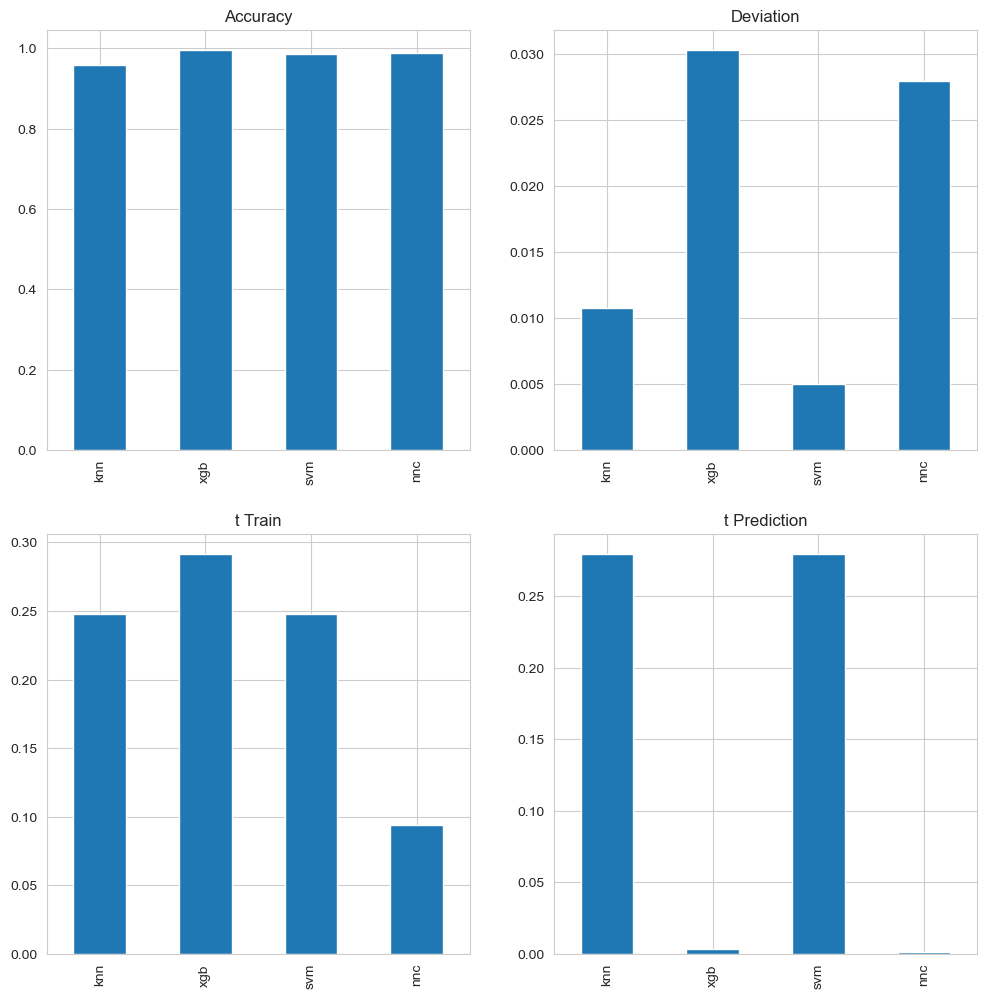

In [121]:
scores_df=pd.DataFrame([score_knn, score_xgb, score_svm, score_nnc])
std_df=pd.DataFrame([std_knn, std_xgb, std_svm, std_nnc])
train_t=pd.DataFrame([knn_train_t, xgb_train_t, svm_train_t, nnc_train_t])
predict_t=pd.DataFrame([knn_predict_t, xgb_predict_t, svm_predict_t, nnc_predict_t])

names=['knn','xgb','svm','nnc']

fig, axes = plt.subplots(figsize=(12,12), nrows=2, ncols=2)

ax=scores_df.plot(kind='bar',title='Accuracy', ax=axes[0,0], legend=False)
ax.set_xticklabels(names)
ax=std_df.plot(kind='bar',title='Deviation', ax=axes[0,1], legend=False)
ax.set_xticklabels(names)
ax=train_t.plot(kind='bar',title='t Train', ax=axes[1,0], legend=False)
ax.set_xticklabels(names)
ax=predict_t.plot(kind='bar',title='t Prediction', ax=axes[1,1], legend=False)
ax.set_xticklabels(names)
print('                                      FIG. 11');

#### Fig. 11: En el panel superior izquierdo vemos que la precisión de todos los modelos es muy buena con una "pequeña superioridad" con XGBOOST. 

#### En el panel superior derecho vemos que las std con XGBOOST y NNC son relativamente grandes respecto a los otros modelos y es mínima con SVM.

#### En el panel inferior izquierdo vemos que el tiempo de entrenamiento es mucho menor con NNC que en los demás modelos.

#### Por último, en el panel inferior derecho vemos que el tiempo de corrida con NNC y XGBOOST es considerablemente menor que el resto. Aunque en todos los modelos el tiempo es menor a 0.3 seg.

Fig. 11: In the upper left panel we see that the accuracy of all models is very good with a "small superiority" with XGBOOST. 

In the upper right panel we see that the std with XGBOOST and NNC are relatively large with respect to the other models and is minimal with SVM.

In the lower left panel we see that the training time is much smaller with NNC than in the other models.

Finally, in the lower right panel we see that the run time with NNC and XGBOOST is considerably less than the others. Although in all models the time is less than 0.3 sec.Fig. 11: In the upper left panel we see that the accuracy of all models is very good with a "small superiority" with XGBOOST. 

In the upper right panel we see that the std with XGBOOST and NNC are relatively large with respect to the other models and is minimal with SVM.

In the lower left panel we see that the training time is much smaller with NNC than in the other models.

Finally, in the lower right panel we see that the run time with NNC and XGBOOST is considerably less than the others. Although in all models the time is less than 0.3 sec.

### 5.- Conclusions

#### Utilizando estos 4 métodos y analizando la precisión, std y los tiempos de entrenamiento y de corrida, teniendo en cuenta nuestro volumen de datos, podemos concluir que el algoritmo de redes neuronales es el mejor ya que tiene una buena presición y es el toma menos tiempo de corrida. Si bien este tiempo no es tan significativo con respecto al resto, para grandes volumenes de datos si podría serlo. En cuanto a la desviación, no es un parametro tan influyente a la hora de comparar ya que en todos los modelos esta es muy pequeña.

Using these 4 methods and analyzing the accuracy, std and training and running times, taking into account our data volume, we can conclude that the neural network algorithm is the best as it has a good accuracy and takes the least running time. Although this time is not so significant with respect to the rest, for large volumes of data it could be. As for the deviation, it is not such an influential parameter for comparison since in all models it is very small.